<center>
    
## Implementasi Backpropagation pada Tabel Kebenaran XOR
    
</center>


### DATA

Data yang digunakan adalah tabel kebenaran XOR sebagai berikut.

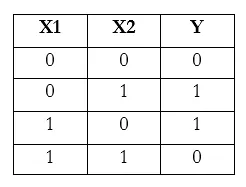

### NEURAL NETWORK MODEL

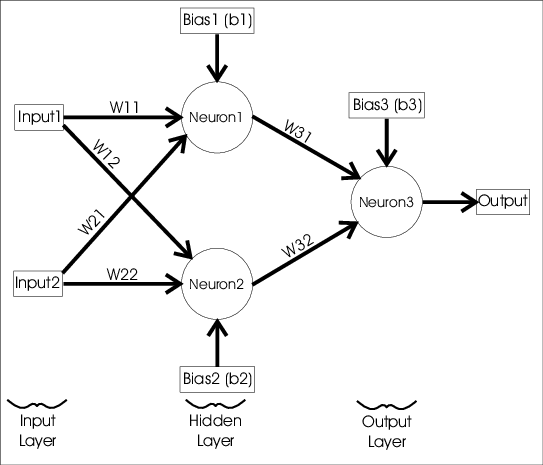

<center>
The Neural Network Model to solve the XOR Logic
</center>

### SIGMOID NEURON

To implement an XOR gate, will be using a Sigmoid Neuron as nodes in the neural network.

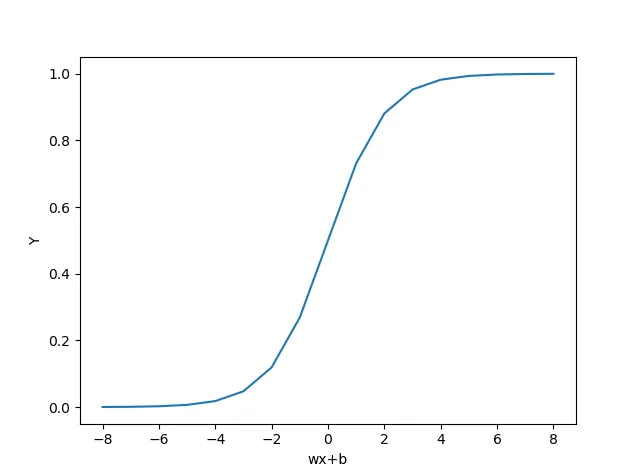

<center>
    The Sigmoidal Curve
</center>

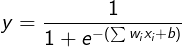

<center>
    The Sigmoid Function
</center>

### GRADIENT DESCENT

Backpropagation dilakukan menggunakan algoritma Gradient Descent.

Fungsi kerugian dari neuron sigmoid adalah squared error loss. Jika kita memplot loss/error terhadap bobot, kita akan mendapatkan sesuatu seperti ini:

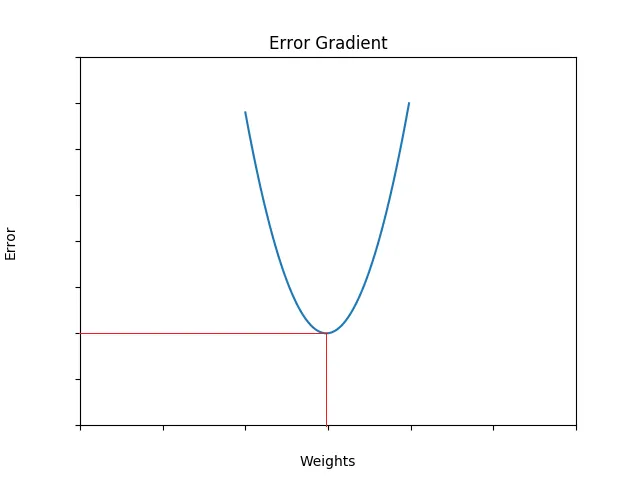

<center>
    Error/Loss vs Weights Graph
</center>

### PYTHON IMPLEMENTATION

In [1]:
import numpy as np 
#np.random.seed(0)

In [2]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [3]:
#Input datasets
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

In [4]:
inputs

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [5]:
expected_output

array([[0],
       [1],
       [1],
       [0]])

In [6]:
epochs = 10000
lr = 0.1
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

In [7]:
#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

print("Initial hidden weights: ",end='')
print(*hidden_weights)
print("Initial hidden biases: ",end='')
print(*hidden_bias)
print("Initial output weights: ",end='')
print(*output_weights)
print("Initial output biases: ",end='')
print(*output_bias)

Initial hidden weights: [0.07718177 0.16628968] [0.80753446 0.1772319 ]
Initial hidden biases: [0.069741  0.0716636]
Initial output weights: [0.87956117] [0.26675346]
Initial output biases: [0.15474952]


In [8]:
#Training algorithm
for _ in range(epochs):
	#Forward Propagation
	hidden_layer_activation = np.dot(inputs,hidden_weights)
	hidden_layer_activation += hidden_bias
	hidden_layer_output = sigmoid(hidden_layer_activation)

	output_layer_activation = np.dot(hidden_layer_output,output_weights)
	output_layer_activation += output_bias
	predicted_output = sigmoid(output_layer_activation)

	#Backpropagation
	error = expected_output - predicted_output
	d_predicted_output = error * sigmoid_derivative(predicted_output)
	
	error_hidden_layer = d_predicted_output.dot(output_weights.T)
	d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

	#Updating Weights and Biases
	output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
	output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
	hidden_weights += inputs.T.dot(d_hidden_layer) * lr
	hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

In [9]:
print("Final hidden weights: ",end='')
print(*hidden_weights)
print("Final hidden bias: ",end='')
print(*hidden_bias)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print("\nOutput from neural network after 10.000 epochs: ",end='')
print(*predicted_output)

Final hidden weights: [5.74735227 3.70173978] [5.7513143  3.70255802]
Final hidden bias: [-2.39270874 -5.6693255 ]
Final output weights: [7.44043358] [-8.05806145]
Final output bias: [-3.35498108]

Output from neural network after 10.000 epochs: [0.05954721] [0.94512256] [0.94510961] [0.05924594]


### Referensi

https://towardsdatascience.com/implementing-the-xor-gate-using-backpropagation-in-neural-networks-c1f255b4f20d